### Cluster
Cluster analysis or clustering is a machine learning technique that involves grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters). It is a common technique for statistical data analysis used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, and bioinformatics.

**Cluster:** A cluster is a group of similar data points that are organized together<br><br>
![Image](https://github.com/user-attachments/assets/091299ac-e350-4a4f-8475-62de99ebeea0)

# K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping subsets (clusters). The algorithm works as follows:

**If dataset can linearly separable then using k-means**

1. **Initialization**: Choose K initial centroids randomly from the dataset.
2. **Assignment**: Assign each data point to the nearest centroid, forming K clusters.
3. **Update**: Recalculate the centroids as the mean of all data points assigned to each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached.

The goal of K-means clustering is to minimize the within-cluster variance, which is the sum of squared distances between data points and their respective centroids.

![Image](https://github.com/user-attachments/assets/b393c4bc-32d5-4709-98ac-5b2d1a359ce4)

The k-means clustering algorithm mainly performs two tasks:

- Determines the best value for K center points or centroids by an iterative process.
- Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

How does the K-Means Algorithm Work?
The working of the K-Means algorithm is explained in the below steps:

- **Step-1:** Select the number K to decide the number of clusters.

- **Step-2:** Select random K points or centroids. (It can be other from the input dataset).

- **Step-3:** Assign each data point to their closest centroid, which will form the predefined K clusters.

- **Step-4:** Calculate the variance and place a new centroid of each cluster.

- **Step-5:** Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

- **Step-6:** If any reassignment occurs, then go to step-4 else go to FINISH.

- **Step-7:** The model is ready.

# Elbow Method

The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for **Within Cluster Sum of Squares**, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

$$
WCSS = \sum_{P_i \in Cluster_1} \text{distance}(P_i, C_1)^2 + \sum_{P_i \in Cluster_2} \text{distance}(P_i, C_2)^2 + \sum_{P_i \in Cluster_3} \text{distance}(P_i, C_3)^2
$$

## Explanation of WCSS Formula

- The term below represents the sum of the squared distances between each data point and its centroid within **Cluster 1**:
  $$
  \sum_{P_i \in Cluster_1} \text{distance}(P_i, C_1)^2
  $$
  The same logic applies to the other two clusters.
- To measure the distance between data points and the centroid, we can use any method such as **Euclidean distance** or **Manhattan distance**.

## Steps to Find the Optimal Number of Clusters

To find the optimal value of clusters, the Elbow method follows the below steps:

1. Execute the **K-means clustering** on a given dataset for different K values (ranges from 1-10).
2. For each value of **K**, calculate the **WCSS** value.
3. Plot a curve between the calculated **WCSS values** and the number of clusters **K**.
4. The sharp point of the bend or a point where the plot looks like an **arm** is considered the best value of **K**.


### Like Elbow graph
![Image](https://github.com/user-attachments/assets/1d9eea67-8979-4aed-9351-b02b8ef5d71c)


### K-Means++

K-Means++ is an enhanced version of the K-Means clustering algorithm. It improves the initialization step by selecting initial centroids in a way that speeds up convergence and improves the quality of the final clusters. The main idea is to spread out the initial centroids by choosing the first centroid randomly and then selecting subsequent centroids based on their distance from the already chosen centroids. This helps in avoiding poor clustering results caused by random initialization.


# Practical

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
dataset = pd.read_csv(r"C:\Users\shark\Desktop\ML Learn\WSCubeTech Part 2\Dataset\Iris row.csv")

In [69]:
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


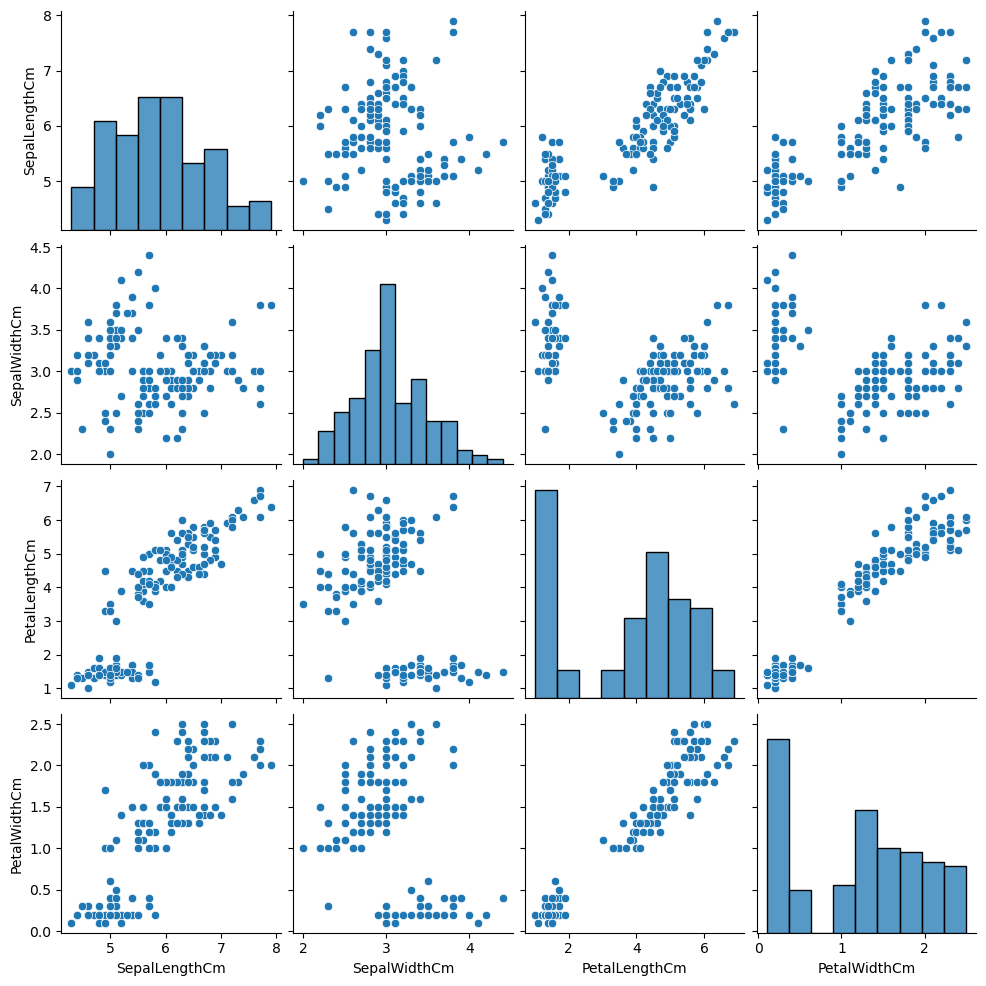

In [70]:
sns.pairplot(data=dataset)
plt.show()

**If dataset can linearly separable then using k-means**

In [71]:
from sklearn.cluster import KMeans

In [72]:
wcss = []

for i in range(2,21):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

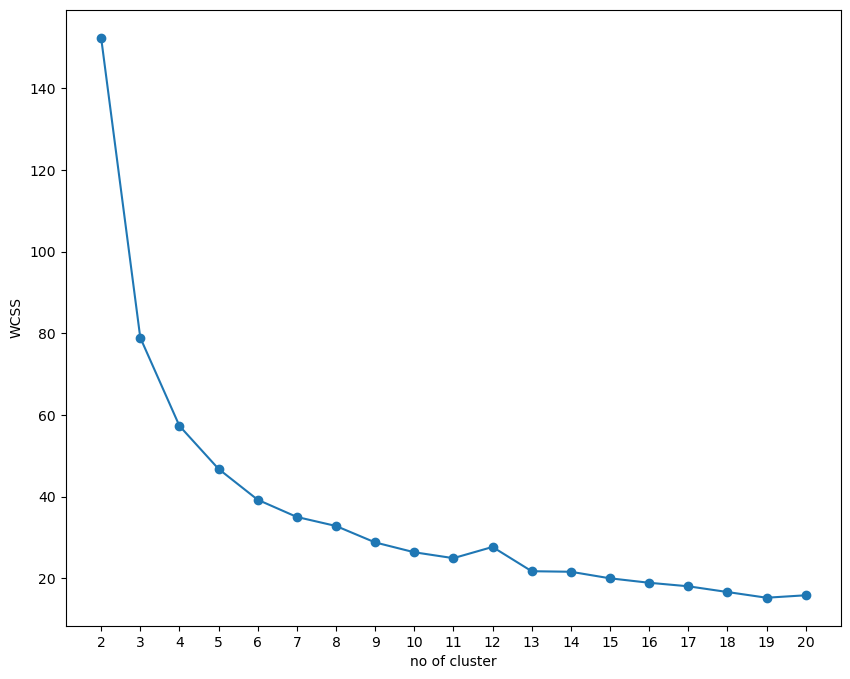

In [73]:
plt.figure(figsize=(10,8))
plt.plot([i for i in range(2,21)],wcss,marker='o')
plt.xticks([i for i in range(2,21)])
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.show()

In [74]:
kmn = KMeans(n_clusters=3)
kmn.fit(dataset)
dataset["predict"] = kmn.predict(dataset)
dataset["predict"]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: predict, Length: 150, dtype: int32

<Figure size 5000x3000 with 0 Axes>

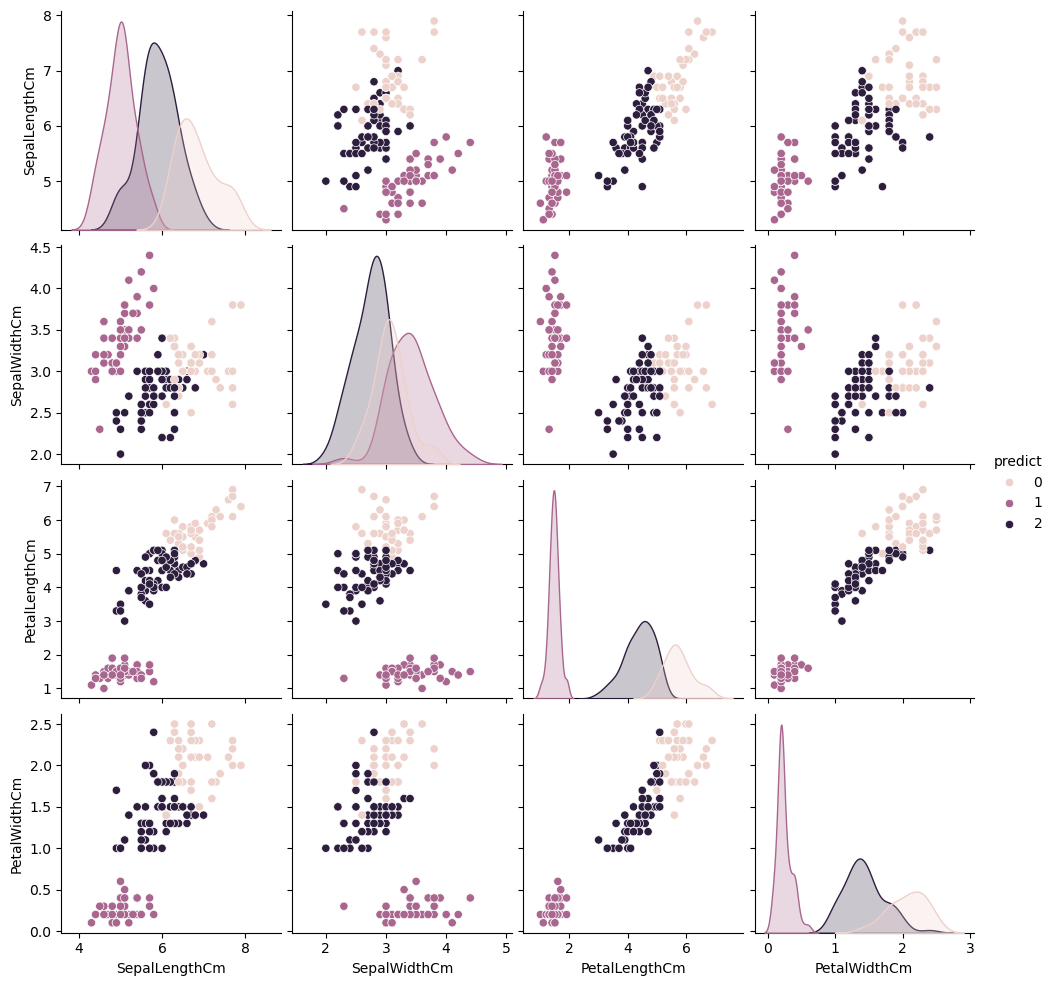

In [75]:
plt.figure(figsize=(50,30))
sns.pairplot(data=dataset,hue="predict")
plt.savefig("k-means.jpg", format='jpg',dpi=300)
plt.show()

In [76]:
kmn5 = KMeans(n_clusters=5)
kmn5.fit(dataset)
dataset["predict5"] = kmn5.predict(dataset)
dataset["predict5"]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0      1
1      4
2      4
3      4
4      1
      ..
145    3
146    2
147    3
148    3
149    2
Name: predict5, Length: 150, dtype: int32

<Figure size 5000x3000 with 0 Axes>

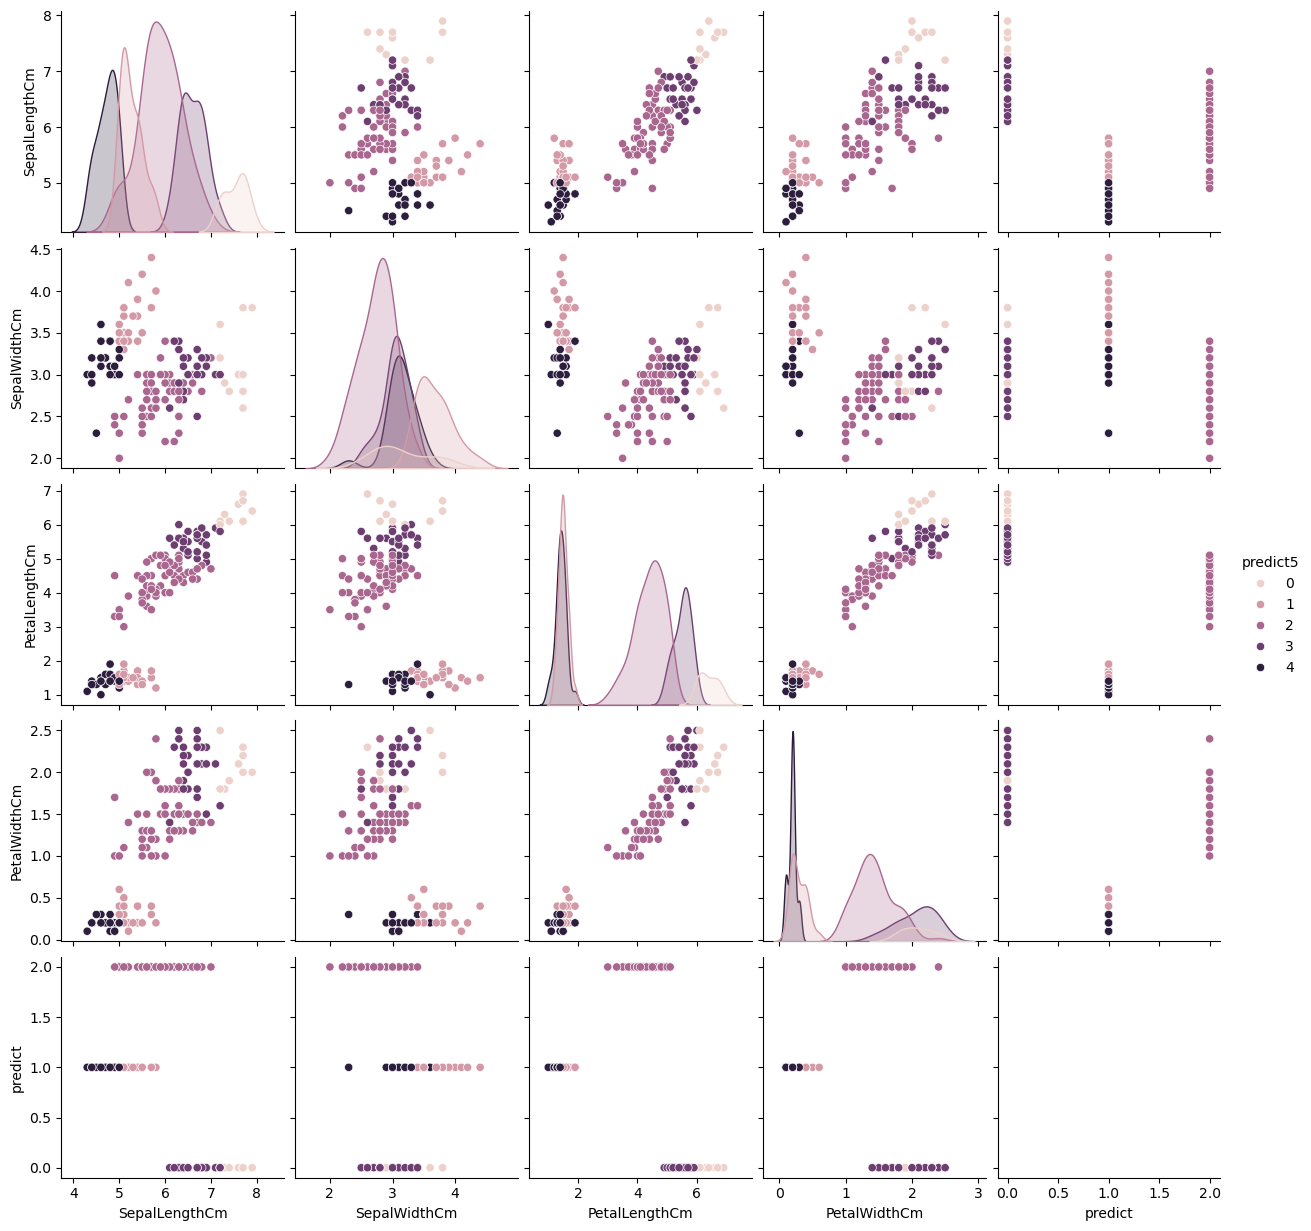

In [77]:
plt.figure(figsize=(50,30))
sns.pairplot(data=dataset,hue="predict5")
plt.savefig("k-means5.jpg", format='jpg',dpi=300)
plt.show()

In [78]:
org_data = pd.read_csv(r"C:\Users\shark\Desktop\ML Learn\WSCubeTech Part 2\Dataset\Iris.csv")
org_data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


<Figure size 5000x3000 with 0 Axes>

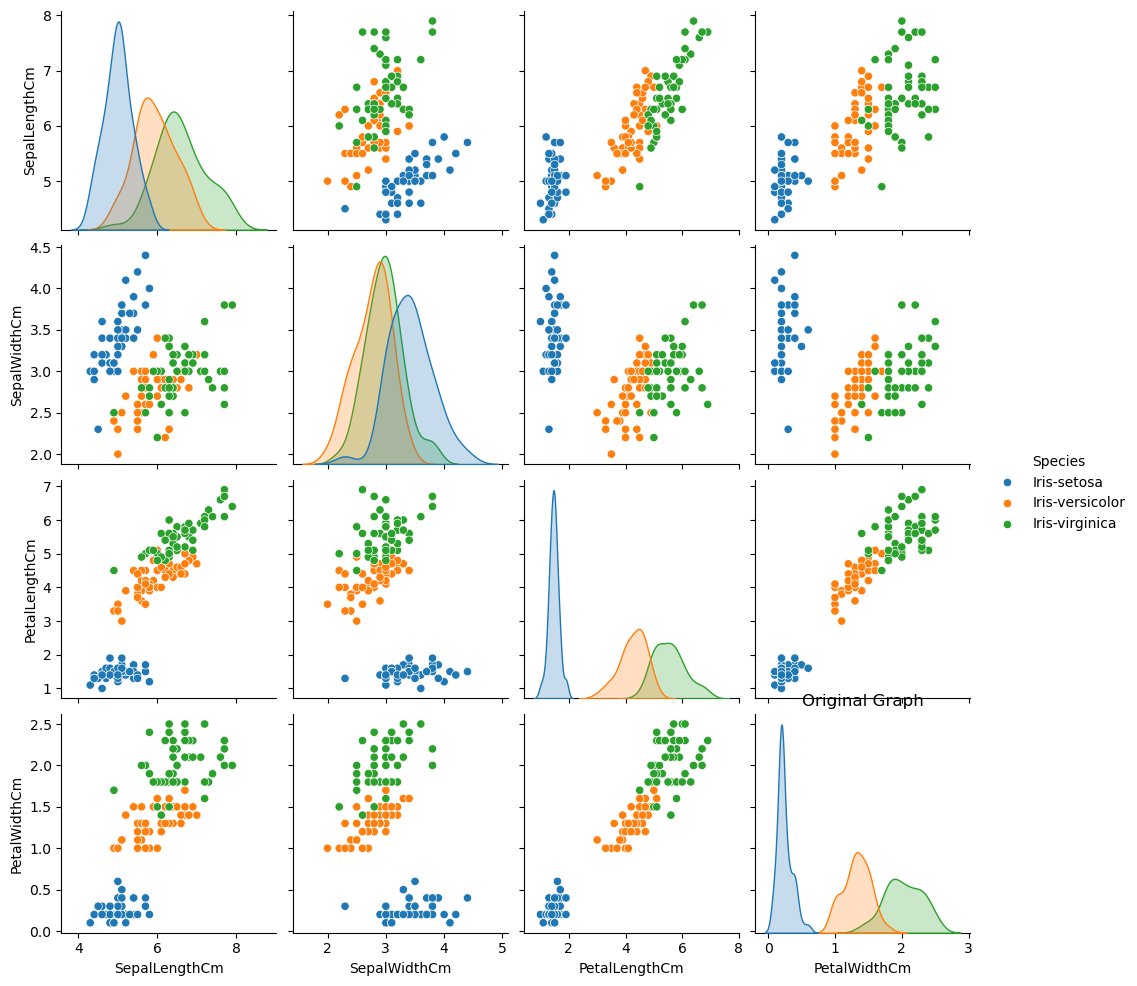

In [79]:
plt.figure(figsize=(50,30))
sns.pairplot(data=org_data,hue="Species")
plt.savefig("k-means_original.jpg", format='jpg',dpi=300)
plt.title("Original Graph")
plt.show()

In [82]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dataset, kmn.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.5583001973443826


## ✅ Silhouette Score Interpretation

- **Below 0.25** → Poor clustering (overlapping clusters or wrong K)
- **0.25 - 0.50** → Weak to moderate clustering (some overlap, but structure exists)
- **0.50 - 0.70** → Good clustering (clear structure, well-separated clusters) ✅
- **Above 0.70** → Excellent clustering (highly distinct clusters, rare in real-world data)
